<a href="https://colab.research.google.com/github/maivan-hoa/Model-Selection/blob/main/Model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phân tích để lựa chọn model trong bài toán phân loại văn bản

Hiểu và sử dụng sklearn để đánh giá model

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Machine Learning/Introduction DS

Mounted at /content/drive
/content/drive/MyDrive/Machine Learning/Introduction DS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets.base import load_files

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Load data from folder**

Data:
- Documents and their labels.
- Sport label: 
    > "Dân_trí Real Madrid đã dẫn trước trong cả trận đấu , nhưng họ vẫn phải chấp_nhận bị Dortmund cầm hòa 2-2 ở Bernabeu . Real Madrid chấp_nhận đứng thứ_hai ở bảng F Champions League ..."

In [3]:
data_train = load_files(container_path = './Exercise/news_1135/', encoding='utf-8')

In [ ]:
data_train

In [ ]:
print('The number of files: {}'.format(len(data_train.filenames)))

The number of files: 1134


# **Divide data into 2 parts**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Transforming data
# Convert text to tf-idf vector
#   - Remove stop words
#   - Generate the vocab
module_count_vector = CountVectorizer() # tạo ma trận thưa chứa số lần xuất hiện các từ trong mỗi văn bản
model_rf_preprocess = Pipeline([('vect', module_count_vector), # chuỗi hành động cần thực hiện (name, transform)
                                ('tfidf', TfidfTransformer())])
# để thực hiện được tfidf cần đếm số lần xuất hiện trước, các tham số của CountVectorizer() có thể có thêm từ điển, stop_word,...

data_preprocessed = model_rf_preprocess.fit_transform(data_train.data)
X_train, X_test, y_train, y_test = train_test_split(data_preprocessed, data_train.target, test_size=0.2)

# fit() - học các tham số của mô hình
# transform() - thực hiện biến đổi dl dựa trên các tham số của fit()
# fit_transform() - kết hợp cả 2 cái trên

# **Build and learn the model**

In [11]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Evaluate**

In [12]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy = {}'.format(accuracy_score(y_test, y_pred)))

Accuracy = 0.8414096916299559


# **Using cross-validation to evaluate models**

In [23]:
# Xây dựng hàm vẽ biểu đồ cho các model khác nhau

from sklearn.model_selection import learning_curve

# function to generate different colors for ids
def get_cmap(n):
  return 'C' + str(n)

# function to train the model, cross-validation and draw with matplotlib
def plot_learning_curve(estimator, title, label_curve, X, y,train_sizes,cv=None, 
                        n_jobs=1, new_plot=False, idx_color=0):
  '''
    - estimator: model với tham số cụ thể nào đó
    - title: tên model
    - label_curve: tên của các line plot
    - X: data train
    - y: label
    - cv: số lượng fold, một fold sẽ được sử dụng để test và các fold còn lại được
          sử dụng để train
    - n_jobs: Number of jobs to run in parallel. Training the estimator and 
              omputing the score are parallelized over the different training 
              and test sets. None means 1 unless in a joblib.parallel_backend 
              context. -1 means using all processors. See Glossary for more details.
    - train_sizes: specifies the training set sizes to be used
                   ex: train_sizes = [0.3, 0.5] means case 1 with 0.3: 0.3 for 
                   training and 0.7 for testing.
                   case 2 with 0.5 means 0.5 for training and 0.5 for validating.
    - idx_color: id của màu line
    - new_plot: có vẽ hình mới hay không

    kích thước tập train lấy từ train_sizes, chạy len(cv) lần, mỗi lần lấy ra 1 
    fold để test -> điểm nối các line là các test score này
  '''
  # Make a new image:
  if new_plot:
    plt.figure()
    plt.title(title)
    plt.xlabel('Training size')
    plt.ylabel('Accuracy')
    plt.grid()

  # Train the model and save some values while training
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv,
                      n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
  # Get the average of all output of folds
  # train_scores là mảng 2 chiều, mỗi hàng tương ứng với 1 train_size, mỗi cột
  # tương ứng 1 fold
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Select a color
  color = get_cmap(idx_color)

  # Draw
  plt.plot(train_sizes, test_scores_mean, 'o-', color=color, label=label_curve)
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color=color)
  plt.legend(loc='best') # Tự tìm vị trí tốt nhất để đặt chú thích
  return plt


**Experiment with different parameters.**

- For each model: random forest, svm, ... selecting parameters is different.

# **Change the number of trees for Random Forest model**

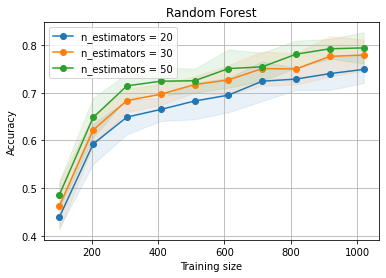

In [24]:
from sklearn.ensemble.forest import RandomForestClassifier
title = 'Random Forest'
for i, n_estimator in enumerate([20, 30, 50]):
  # with each estimator, we will build and learn the corresponding model
  rf = RandomForestClassifier(criterion='gini', n_estimators=n_estimator)
  plt = plot_learning_curve(rf, title, "n_estimators = {}".format(n_estimator),
                              data_preprocessed, data_train.target,
                              train_sizes=np.linspace(.1, 1.0, 10),
                              cv=10, n_jobs=-1, idx_color=i, new_plot=i == 0)
plt.show()


# **Comparision of best models**

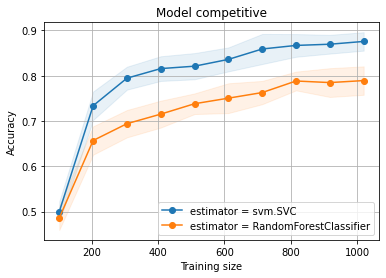

In [25]:
title = 'Model competitive'

best_models = [
    svm.SVC(kernel='linear', C=1.0),
    RandomForestClassifier(criterion='gini', n_estimators=50)
]

best_models_name = [
    'svm.SVC',
    'RandomForestClassifier'
]

for i, estimator in enumerate(best_models):
  plt = plot_learning_curve(estimator, title, "estimator = {}".format(best_models_name[i]),
                            data_preprocessed, data_train.target,
                            train_sizes=np.linspace(.1, 1.0, 10),
                            cv=10, n_jobs=-1, idx_color=i, new_plot=i == 0)
plt.show()
